# This script analsis sensor behavior and try to explain the mismatch in DF region.

In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
from skimage import measure
from skimage import filters

# Long range flucuation on sensor
Image series were acquired with 100fps over 200sec, possible to detect long range flucuation in dark current.

In [73]:
from skimage import measure
from skimage import filters
intensity_list = []
accumulated_frame = np.zeros((512,512))
path = '/srv/home/chenyu/DEbackup/061019/Test2/Center/npy/'

for iframe in range(1,20000):
    frame = np.load(path + 'S0_' + format(iframe,'05') + '.npy')
    intensity_list.append(np.sum(frame))
    accumulated_frame = accumulated_frame + frame

-136668.2360524322


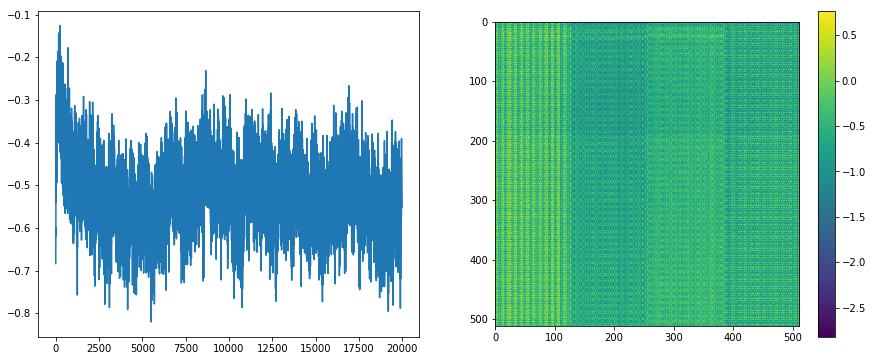

In [82]:
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.plot(np.asarray(intensity_list[25:-1])/512/512)
print(np.mean(intensity_list[25:-1]))

fig.add_subplot(122)
plt.imshow(accumulated_frame/20000)
plt.colorbar()

# Difference between column closed, screen down, and beam blanked
These series were collected with no beam and didn't use 4DSTEM scan controller, i.e. 1100FPS with darkref collected with 1100FPS, should have no artifact in dark reference image.

In [48]:
from skimage import measure
from skimage import filters
intensity_list_valveclose = []
intensity_list_beamblank = []
intensity_list_screendown = []
# accumulated_frame = np.zeros((512,512))
path1 = '/srv/home/chenyu/DEbackup/061619/Test2/ColumnClosed/npy/'
path2 = '/srv/home/chenyu/DEbackup/061619/Test2/BeamBlanked/npy/'
path3 = '/srv/home/chenyu/DEbackup/061619/Test2/ScreenDown/npy/'

for iframe in range(1,10000):
    frame = np.load(path1 + 'DE16_' + format(iframe,'05') + '.npy')
    intensity_list_valveclose.append(np.sum(frame))
    frame = np.load(path2 + 'DE16_' + format(iframe,'05') + '.npy')
    intensity_list_beamblank.append(np.sum(frame))
    frame = np.load(path3 + 'DE16_' + format(iframe,'05') + '.npy')
    intensity_list_screendown.append(np.sum(frame))

In [62]:
len(intensity_list_valveclose)

9999

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


-35223.30398284537
-66747.83515206158
-35475.38162651623


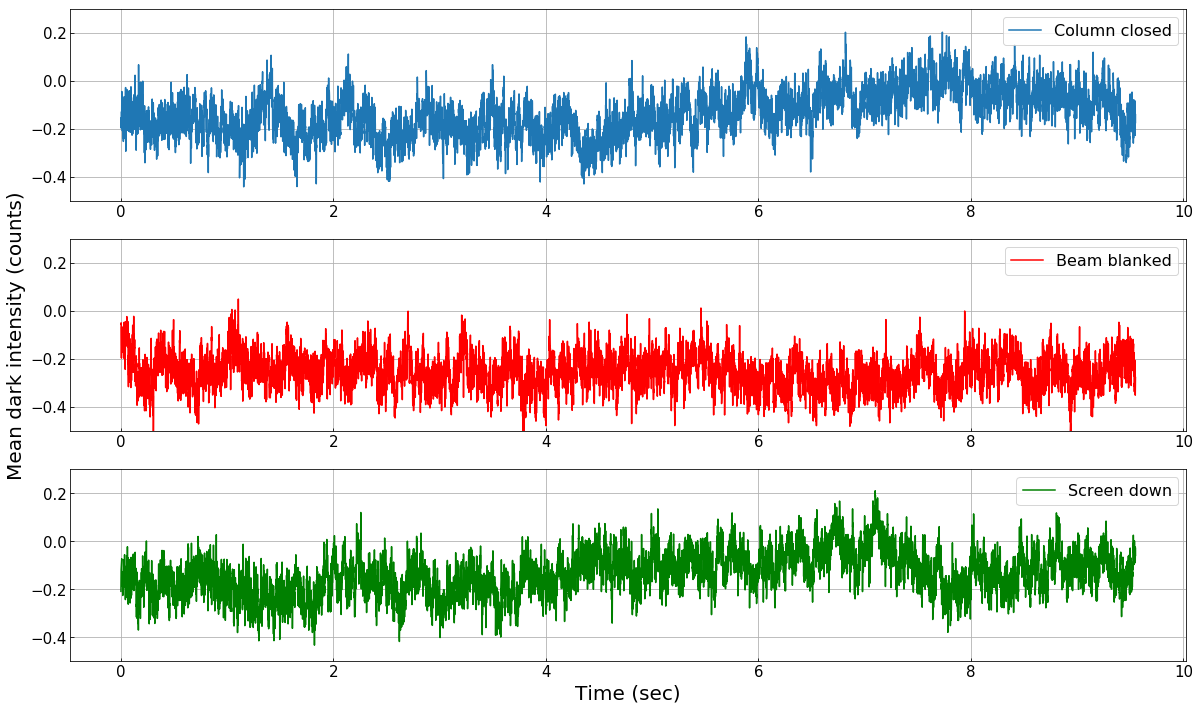

In [75]:
time = np.linspace(0,9998/1047,9999)

fig = plt.figure(figsize=(20,12))
fig.add_subplot(311)
plt.plot(time,np.asarray(intensity_list_valveclose)/512/512,label='Column closed')
plt.ylim([-0.5,0.3])
plt.grid('on')
plt.legend(fontsize=16)
plt.tick_params(labelsize=15,direction='in')
print(np.mean(intensity_list_valveclose[25:-1]))

fig.add_subplot(312)
plt.plot(time,np.asarray(intensity_list_beamblank)/512/512,label='Beam blanked',c='red')
plt.ylim([-0.5,0.3])
plt.grid('on')
plt.ylabel('Mean dark intensity (counts)', fontsize=20)
plt.tick_params(labelsize=15,direction='in')
plt.legend(fontsize=16)
print(np.mean(intensity_list_beamblank[25:-1]))

fig.add_subplot(313)
plt.plot(time,np.asarray(intensity_list_screendown)/512/512,label='Screen down',c='green')
plt.ylim([-0.5,0.3])
plt.grid('on')
print(np.mean(intensity_list_screendown[25:-1]))
plt.xlabel('Time (sec)',fontsize=20)
plt.legend(fontsize=16)
plt.tick_params(labelsize=15,direction='in')

## Residual pattern on sensor
It is clear from the frames collected without beam and after dark correction that there are some pattern on the sensor, probably related to how the readout circuit is distributed. The same pattern is still dominating at low dose region with beam presenting.
<br>061219/S0_noBeam and S0_noBeam_2 was collected using 4DSTEM scan controller, i.e. 1047FPS on dark ref collected with 1100FPS. Which shows nominally negative value across the whole series, with some flucuation, which agrees with the hypothesis from dark reference collected with different frame rate.

In [77]:
from skimage import measure
from skimage import filters
intensity_list = []
accumulated_frame = np.zeros((512,512))
path = '/srv/home/chenyu/DEbackup/061219/S0_noBeam/npy/'
for iframe in range(1,20000):
    frame = np.load(path + 'S0_' + format(iframe,'05') + '.npy')
#     intensity_list.append(frame[-32,-32])
    intensity_list.append(np.sum(frame))
    accumulated_frame = accumulated_frame + frame

-136668.2360524322


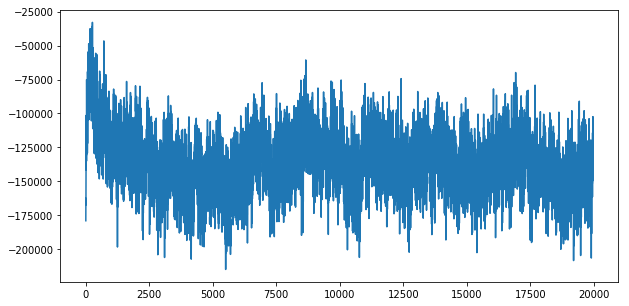

In [80]:
fig = plt.figure(figsize=(10,5))
im = plt.plot(np.asarray(intensity_list[25:-1]))
print(np.mean(intensity_list[25:-1]))

-0.5232716340895597


Text(0.5, 1.0, '4DSTEM with counting filter')

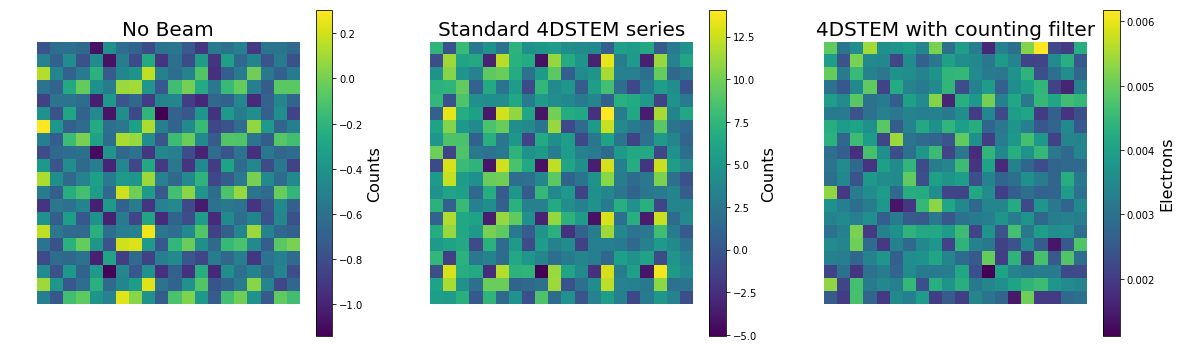

In [87]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(131)
plt.imshow(accumulated_frame[-30:-10,-30:-10]/20000)
print(np.mean(accumulated_frame/20000))
cbar = plt.colorbar()
cbar.set_label('Counts',fontsize=16)
plt.axis('off')
plt.title('No Beam',fontsize=20)

fig.add_subplot(132)
PACBED_exp = np.load('/srv/home/chenyu/DEbackup/061219/S3/PACBED.npy')
plt.imshow(PACBED_exp[-30:-10,-30:-10]/2500)
cbar = plt.colorbar()
cbar.set_label('Counts',fontsize=16)
plt.axis('off')
plt.title('Standard 4DSTEM series',fontsize=20)

fig.add_subplot(133)
PACBED_exp_counting = np.load('/srv/home/chenyu/DEbackup/022119/S5/PACBED_counting_threshold_50.npy')
plt.imshow(PACBED_exp_counting[-30:-10,-30:-10]/22500)
cbar = plt.colorbar()
cbar.set_label('Electrons',fontsize=16)
plt.axis('off')
plt.title('4DSTEM with counting filter',fontsize=20)

344.149169921875


(-0.5, 19.5, 19.5, -0.5)

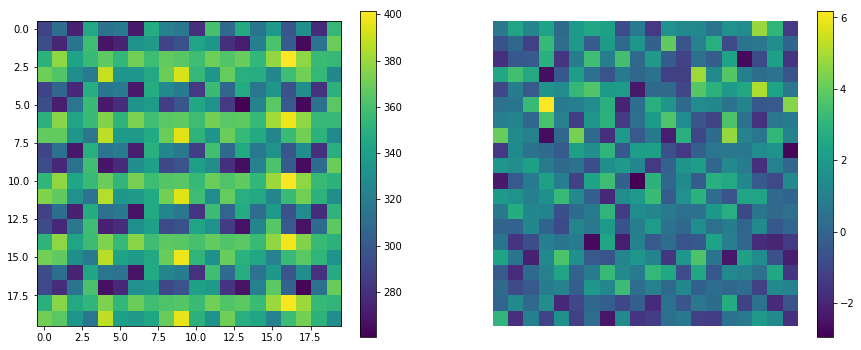

In [78]:
DarkRef = loadMRCfile('/srv/home/chenyu/DEbackup/061019/Test1/ColumnClosed/S0.seq.dark.mrc')
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
plt.imshow(DarkRef[-30:-10,-30:-10])
plt.colorbar()
print(DarkRef[-32,-32])

fig.add_subplot(122)
frame = np.load('/srv/home/chenyu/DEbackup/061019/Test1/ColumnClosed/npy/S0_11000.npy')
plt.imshow(frame[-30:-10,-30:-10])
plt.colorbar()
plt.axis('off')

# Frame rate dependent for dark intensity and gain
Higher frame rate would lead to a higher averaged intensity in dark reference. Meaning when running under 1047FPS but use dark reference collected at 1100FPS, dark background is over-corrected. The frame should have nominally negative intensity when there is no beam present.
<br><font color='red'> From current test, it seems dark reference depends heavily on frame rate, and the difference is enough to generate difference at DF region. Gain reference is mostly constant for different frame rates.

In [88]:
path = '/srv/home/chenyu/DEbackup/061219/DarkRefSeries/'
filelist = glob.glob1(path,'*.mrc')
framerate_list = []
meanint_list = []
pxint_low_list = [] # collect intensity from a dark pixel
pxint_high_list = [] # collect intensity from a bright pixel
for i in range(len(filelist)):
    file = filelist[i]
    darkref = loadMRCfile(path+file)
    framerate_list.append(float(filelist[i].split('_')[-2]))
    meanint_list.append(np.mean(darkref))
    pxint_low_list.append(darkref[-29,-29])
    pxint_high_list.append(darkref[-27,-26])

In [91]:
print(meanint_list)
print(framerate_list)

[323.63116595125757, 315.0353563968674, 322.46133285033284, 321.81724646972725, 305.1524162029382, 326.16665983054554, 323.0023630435462, 319.50739581906237, 309.0091202185722, 324.0872188603971, 324.58529361884575, 313.55976387119154, 325.0135011297534, 321.07807755772956, 318.55870541068725, 311.62127143581165, 316.3943593709264, 326.4942064221832, 325.78134302189574, 320.39282034512144, 325.4139069499215, 317.50424074585317]
[750.0, 250.0, 650.0, 600.0, 50.0, 1050.0, 700.0, 450.0, 100.0, 800.0, 850.0, 200.0, 900.0, 550.0, 400.0, 150.0, 300.0, 1100.0, 1000.0, 500.0, 950.0, 350.0]


/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


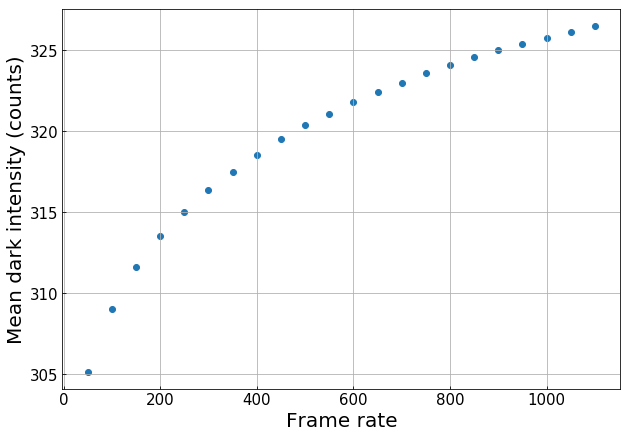

In [89]:
fig = plt.figure(figsize=(10,7))
plt.scatter(framerate_list,meanint_list,label='Mean intensity')
# plt.scatter(framerate_list,pxint_low_list,label='Bright pixel')
# plt.scatter(framerate_list,pxint_high_list,label='Dark pixel')
plt.xlabel('Frame rate',fontsize=20)
plt.ylabel('Mean dark intensity (counts)', fontsize=20)
plt.tick_params(labelsize=15,direction='in')
# plt.legend(fontsize=20)
plt.grid('on')

In [22]:
path = '/srv/home/chenyu/DEbackup/061319/Test2/GainRefs/'
filelist = glob.glob1(path,'*.mrc')
framerate_list = []
meanint_list = []
for i in range(len(filelist)):
    file = filelist[i]
    darkref = loadMRCfile(path+file)
    framerate_list.append(float(filelist[i].split('_')[-2]))
    meanint_list.append(np.mean(darkref))

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


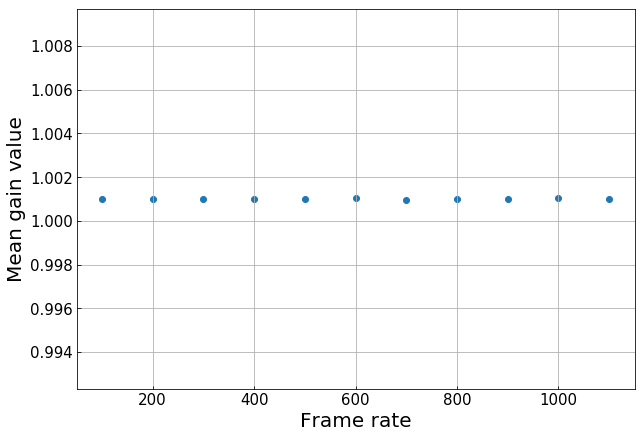

In [23]:
fig = plt.figure(figsize=(10,7))
plt.scatter(framerate_list,meanint_list,label='Mean intensity')
plt.xlabel('Frame rate',fontsize=20)
plt.ylabel('Mean gain value', fontsize=20)
plt.tick_params(labelsize=15,direction='in')
plt.grid('on')

# Blank intensity with different frame rate

In [12]:
path1 = '/srv/home/chenyu/DEbackup/061319/Test3/'
path3 = '/srv/home/chenyu/DEbackup/061319/Test2/'
path2 = '/srv/home/chenyu/DEbackup/061619/Test1/'
framerate_list = []
intensity_list_1 = []
intensity_list_2 = []
intensity_list_3 = []
for i in range(11):
    framerate = (i+1)*100
    
    fullpath = path1 + str(framerate) + 'FPS/npy/'
    filelist = glob.glob1(fullpath,'*.npy')
    intensity = 0
    if len(filelist)==0:
        continue
    print('Workin on ' + str(framerate) + ' FPS, total ' + str(len(filelist)) + ' files.')
    for ifile in range(1000):
        intensity = intensity + np.sum(np.load(fullpath+filelist[ifile]))
    intensity = intensity / len(filelist)
    intensity_list_1.append(intensity)
    
    fullpath = path2 + str(framerate) + 'FPS/npy/'
    filelist = glob.glob1(fullpath,'*.npy')
    intensity = 0
    if len(filelist)==0:
        continue
    print('Workin on ' + str(framerate) + ' FPS, total ' + str(len(filelist)) + ' files.')
    for ifile in range(1000):
        intensity = intensity + np.sum(np.load(fullpath+filelist[ifile]))
    intensity = intensity / len(filelist)
    intensity_list_2.append(intensity)
    
    fullpath = path3 + str(framerate) + 'FPS/npy/'
    filelist = glob.glob1(fullpath,'*.npy')
    intensity = 0
    if len(filelist)==0:
        continue
    print('Workin on ' + str(framerate) + ' FPS, total ' + str(len(filelist)) + ' files.')
    for ifile in range(1000):
        intensity = intensity + np.sum(np.load(fullpath+filelist[ifile]))
    intensity = intensity / len(filelist)
    intensity_list_3.append(intensity)
    
    framerate_list.append(framerate)

Workin on 100 FPS, total 2000 files.
Workin on 100 FPS, total 2001 files.
Workin on 100 FPS, total 3000 files.
Workin on 200 FPS, total 4001 files.
Workin on 200 FPS, total 4001 files.
Workin on 200 FPS, total 6000 files.
Workin on 300 FPS, total 6002 files.
Workin on 300 FPS, total 6001 files.
Workin on 300 FPS, total 9003 files.
Workin on 400 FPS, total 8002 files.
Workin on 400 FPS, total 8002 files.
Workin on 400 FPS, total 12000 files.
Workin on 500 FPS, total 10000 files.
Workin on 500 FPS, total 10003 files.
Workin on 500 FPS, total 15007 files.
Workin on 600 FPS, total 12007 files.
Workin on 600 FPS, total 12006 files.
Workin on 600 FPS, total 18000 files.
Workin on 700 FPS, total 14006 files.
Workin on 700 FPS, total 14008 files.
Workin on 700 FPS, total 21010 files.
Workin on 800 FPS, total 16004 files.
Workin on 800 FPS, total 16005 files.
Workin on 800 FPS, total 24003 files.
Workin on 900 FPS, total 18004 files.
Workin on 900 FPS, total 18004 files.
Workin on 900 FPS, tota

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


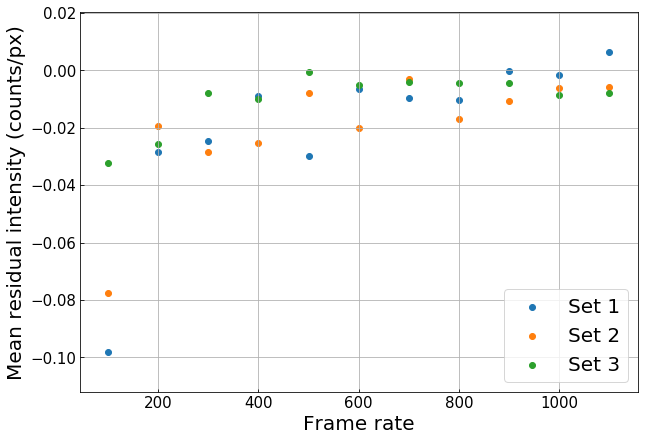

In [17]:
fig = plt.figure(figsize=(10,7))

plt.xlabel('Frame rate',fontsize=20)
plt.ylabel('Mean residual intensity (counts/px)', fontsize=20)
plt.tick_params(labelsize=15,direction='in')
plt.grid('on')

plt.scatter(framerate_list,np.asarray(intensity_list_1)/512/512, label = 'Set 1')
plt.scatter(framerate_list,np.asarray(intensity_list_2)/512/512, label = 'Set 2')
plt.scatter(framerate_list,np.asarray(intensity_list_3)/512/512, label = 'Set 3')

plt.legend(fontsize=20)

# Difference when open column valve
From previous observation, it seems sensor intensity drop compare to no beam. Test was made by open valve and expose sensor to low dose beam at around frame # 3000 with 1100 frames per second.
<br><font color='red'>From the current test, it seems the intensity drop for once when exposed to the low dose beam, but no intensity drop overall. It also looks the average intensity starts at 0, intensity starts to drop afterwards to negative value.

In [71]:
intensity_list = []
path = '/srv/home/chenyu/DEbackup/061319/Test1/npy/'
for iframe in range(1,10000):
    frame = np.load(path + 'S0_' + format(iframe,'05') + '.npy')
    intensity_list.append(np.sum(frame))

-64070.629658882004


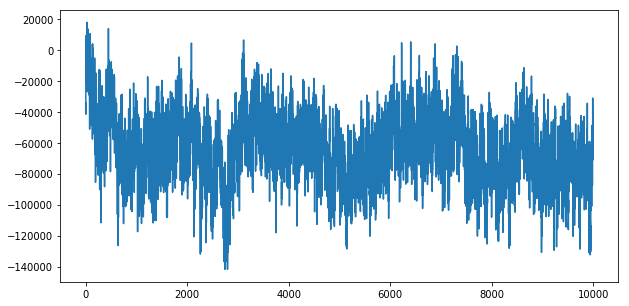

In [72]:
fig = plt.figure(figsize=(10,5))
im = plt.plot(np.asarray(intensity_list))
print(np.mean(intensity_list))

# Residual intensity with beam present

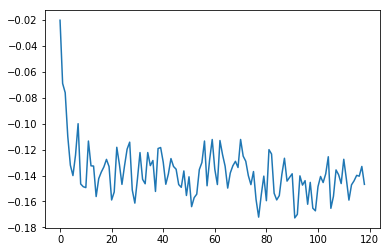

In [46]:
frame = np.load('/srv/home/chenyu/DEbackup/061219/S0/AccumualtedFrame.npy')
kx = np.linspace(0,511,512)
ky = np.linspace(0,511,512)
weights_x, weights_y = np.meshgrid(kx,ky)

COM_x = np.average(weights_x,weights = frame)
COM_y = np.average(weights_y,weights = frame)

Intensity_lineprofile = convert (frame, [512,512], center=[COM_y,COM_x])
Intensity_lineprofile = np.average(Intensity_lineprofile,axis=1)
plt.plot(Intensity_lineprofile[180:-1])

# Aux functions

In [20]:
import struct
def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image

In [35]:
from scipy.interpolate import griddata
from numpy import exp, abs,angle
from scipy.interpolate import RectBivariateSpline

def convert (img, size, center, correction=False, plot=False):
    '''
    :param img: a 2-d array for the image to convert to polar coordinates
    :param center: x,y coordinates for the center of the image
    :param correction: the circular correction
    :param size: [x,y] describing the pixel dimensions of the photo
    :return: polar_img r vs. theta
    '''
    phase_width = 360
    r_inital = 0
    r_final =300
    final_theta, final_r = create_grid(np.linspace(-1*np.pi,np.pi,phase_width),np.arange(0,r_final,1))
#     initial_x, initial_y = create_grid(range(1,size[0]+1),range(1,size[1]+1))
#     initial_y, initial_x = range(1, 513), range(1, 513)
    initial_y, initial_x = range(1, size[0]+1), range(1, size[1]+1)
    final_x, final_y = polar_list_to_cartesian(final_r,final_theta,center)
    
    #initial_theta, initial_r = cartesian_list_to_polar(initial_x,initial_y,center)
#     inten = np.reshape(img,size[0]*size[1])
#     polar_img = griddata((initial_x,initial_y),inten,(final_x,final_y), method='linear')
    inten = img
    spline = RectBivariateSpline(initial_x, initial_y,inten,kx=1,ky=1)
    polar_img = spline.ev(final_x,final_y)
    
    polar_img = np.reshape(polar_img, [r_final, phase_width])
    if plot:
        plt.imshow(polar_img, extent=(0, 6.293, 0, 6))
        plt.show()
    return polar_img

def cartesian_to_polar(x,y,center):
    '''
    A function that converts the x,y coordinates to polar ones.
    -Does not do the circular correction
    '''
    corrected_x= x-center[0]
    corrected_y= y-center[1]
    theta = np.arctan2(corrected_y,corrected_x)
    r = np.sqrt(corrected_x**2+ corrected_y**2)
    return theta,r

def polar_to_cartesian(r, theta, center):
    x = center[0]+r*np.cos(theta)
    y = center[1] +r*np.sin(theta)
    return x,y

def cartesian_list_to_polar(x_list,y_list,center):
    theta_list = []
    r_list = []
    for x,y in zip(x_list,y_list):
        t,r =cartesian_to_polar(x,y,center)
        theta_list.append(t)
        r_list.append(r)
    return theta_list, r_list

def polar_list_to_cartesian(r_list,theta_list, center):
    x_list = []
    y_list = []
    for r, t in zip(r_list,theta_list):
        x,y = polar_to_cartesian(r,t,center)
        x_list.append(x)
        y_list.append(y)
    return x_list,y_list

def create_grid (dimension1,dimension2):
    '''
    Takes data from array of points turns it into a grid of coordinates
    '''
    dim1,dim2 =np.meshgrid(dimension1,dimension2)
    size = len(dimension1)*len(dimension2)
    a,b = np.reshape(dim1,size),np.reshape(dim2,size)
    return a,b

def circular_grid_data(intial_r, initial_theta, intensity, final_r,final_theta):
    #interpolating the radi and theta values from the cartesian points and mapping the intesities to evenly spaced
    # points in r an theta through linear interpolation... possibly some other interpolation....
    #for r,t in zip(final_r,final_theta):

    return
